<a href="https://colab.research.google.com/github/shrestharushika/uHack/blob/main/uHack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=pd.read_csv("/content/drive/My Drive/dataset/uHack/train.csv")
test=pd.read_csv("/content/drive/My Drive/dataset/uHack/test.csv")

In [ ]:
train.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
test.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,Made of very thin cheap metal broke on very fi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"As good as the brand names, no jams or misfire...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"unit was easy to use, with understandable in s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,I am the new family plumber. Works well. No pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Seems to be holding up well.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Id                             6136 non-null   int64 
 1   Review                         6136 non-null   object
 2   Components                     6136 non-null   int64 
 3   Delivery and Customer Support  6136 non-null   int64 
 4   Design and Aesthetics          6136 non-null   int64 
 5   Dimensions                     6136 non-null   int64 
 6   Features                       6136 non-null   int64 
 7   Functionality                  6136 non-null   int64 
 8   Installation                   6136 non-null   int64 
 9   Material                       6136 non-null   int64 
 10  Price                          6136 non-null   int64 
 11  Quality                        6136 non-null   int64 
 12  Usability                      6136 non-null   int64 
 13  Pol

In [ ]:
train.describe()

,Id,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
count,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000
mean,3067.500000,0.044654,0.029172,0.105932,0.113266,0.051010,0.413625,0.124185,0.025261,0.139179,0.354791,0.200293,0.777379
std,1771.454958,0.206561,0.168302,0.307776,0.316943,0.220037,0.492523,0.329820,0.156929,0.346161,0.478489,0.400252,0.416040
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1533.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3067.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4601.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,6135.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


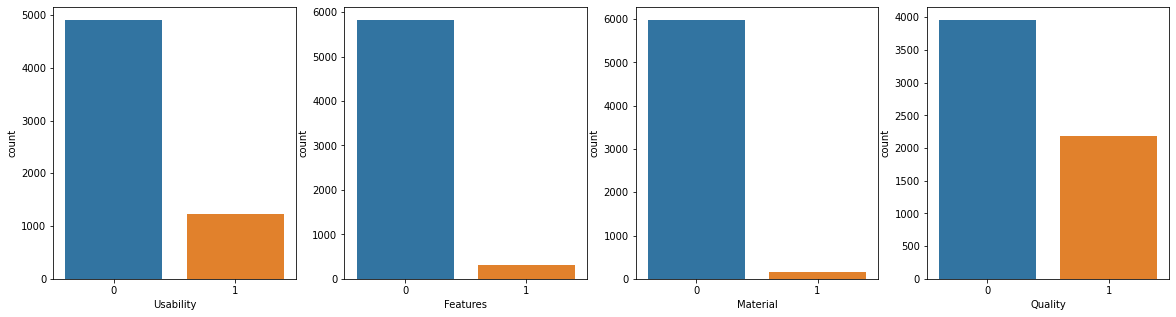

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
sns.countplot(x="Usability",data=train)

plt.subplot(1,4,2)
sns.countplot(x="Features",data=train)

plt.subplot(1,4,3)
sns.countplot(x="Material",data=train)

plt.subplot(1,4,4)
sns.countplot(x="Quality",data=train)

In [ ]:
train.columns

Index(['Id', 'Review', 'Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity'],
      dtype='object')

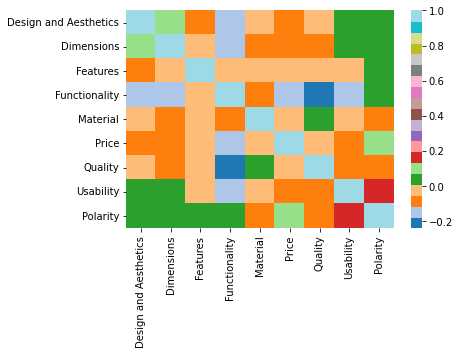

In [ ]:
x=['Id', 'Review', 'Components', 'Delivery and Customer Support',
       'Installation']
sns.heatmap(train.drop(x,axis=1).corr(),cmap="tab20")

#Data Combining

In [ ]:
final_data=pd.concat([train,test],axis=0)

In [ ]:
final_data.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,"I like everything about it, great choice of sp...",0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,Excellent ceiling fan brace. Easy to install a...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,3,Work great easy to use . No issues at all with...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,4,I would recommend this product because it is p...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
final_data.columns

Index(['Id', 'Review', 'Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity'],
      dtype='object')

In [ ]:
x=['Components', 'Delivery and Customer Support','Design and Aesthetics', 'Dimensions', 'Features', 'Functionality','Installation', 'Material', 'Price', 'Quality', 'Usability', 'Polarity']

for i in x:
  final_data[i]=final_data[i].astype(object).fillna("unknown")


In [ ]:
final_data.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
reviews=final_data["Review"]
reviews

0       For some reason everybody complains and I'm co...
1       I like everything about it, great choice of sp...
2       Excellent ceiling fan brace. Easy to install a...
3       Work great easy to use . No issues at all with...
4       I would recommend this product because it is p...
                              ...                        
2626    Very strong piece of hardware. Easy to adjust ...
2627    Great supot.  Square Wich is better to line up...
2628             No jams, no problems. Good quality nail!
2629    Chair cushion is and very firm, however nice r...
2630    Easy to work with and install. We use this for...
Name: Review, Length: 8767, dtype: object

#NLP 

1. Stopwords Removal

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords=list(stopwords.words('english'))

In [ ]:
stopwords[1:25]

['me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers']

In [ ]:
import re

def tokenization(text):
  words=word_tokenize(text)
  return words

def stopwords_removal(tokens,stopwordsremoval):
  for i in tokens:
    if i not in stopwords:
      stopwordsremoval.append(i)
  return stopwordsremoval

def punctuation_removal(text):
  new_text=[]
  for i in text:
    result= re.sub('[^\w\s]','',i)

    if result!='':
      new_text.append(result)
  return new_text

In [ ]:
reviews[4]

4    I would recommend this product because it is p...
4                         Seems to be holding up well.
Name: Review, dtype: object

In [ ]:
tokenized_sen=[]
new_text=[]
for i in reviews:
   sen=tokenization(i) #tokenization
   tokenized_sen.append(sen)

print("Tokenized sentences",tokenized_sen[0:5])

for i in tokenized_sen:
   n=punctuation_removal(i)
   new_text.append(n) 

Tokenized sentences [['For', 'some', 'reason', 'everybody', 'complains', 'and', 'I', "'m", 'complaining', 'now', 'about', 'my', 'toilet', 'that', 'I', 'just', 'boughtFor', 'some', 'reason', 'it', "'s", 'not', 'ceiling', 'from', 'the', 'tank', 'to', 'the', 'pedestal', 'I', 'ca', "n't", 'get', 'it', 'sealed', 'without', 'cracking', 'the', 'toilet', 'support', 'design', 'for', 'some', 'reason', 'I', "'m", 'very', 'unhappy', 'with', 'his', 'toilet', 'never', 'buy', 'American', 'standard', 'again'], ['I', 'like', 'everything', 'about', 'it', ',', 'great', 'choice', 'of', 'spray', 'patterns', ',', 'it', 'puts', 'out', 'a', 'large', 'volume', 'of', 'water', 'out', 'of', 'my', '1', "''", 'pipes'], ['Excellent', 'ceiling', 'fan', 'brace', '.', 'Easy', 'to', 'install', 'and', 'well', 'made'], ['Work', 'great', 'easy', 'to', 'use', '.', 'No', 'issues', 'at', 'all', 'with', 'hanging', 'fan'], ['I', 'would', 'recommend', 'this', 'product', 'because', 'it', 'is', 'perfect', 'for', 'watering', 'hangi

In [ ]:

#Stopwords removal
stopwordsremoval=[]
stopwords_removed=[]
stopwords_removed=stopwords_removal(new_text,stopwordsremoval)   

In [ ]:
print("After removing the stopwords\n",stopwords_removed[0:3])

After removing the stopwords
 [['For', 'some', 'reason', 'everybody', 'complains', 'and', 'I', 'm', 'complaining', 'now', 'about', 'my', 'toilet', 'that', 'I', 'just', 'boughtFor', 'some', 'reason', 'it', 's', 'not', 'ceiling', 'from', 'the', 'tank', 'to', 'the', 'pedestal', 'I', 'ca', 'nt', 'get', 'it', 'sealed', 'without', 'cracking', 'the', 'toilet', 'support', 'design', 'for', 'some', 'reason', 'I', 'm', 'very', 'unhappy', 'with', 'his', 'toilet', 'never', 'buy', 'American', 'standard', 'again'], ['I', 'like', 'everything', 'about', 'it', 'great', 'choice', 'of', 'spray', 'patterns', 'it', 'puts', 'out', 'a', 'large', 'volume', 'of', 'water', 'out', 'of', 'my', '1', 'pipes'], ['Excellent', 'ceiling', 'fan', 'brace', 'Easy', 'to', 'install', 'and', 'well', 'made']]


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer

def lemmatization(sentence):
  lemmatizer=WordNetLemmatizer()
  
  lemma=[]
  for i in sentence:
      lemmatized=lemmatizer.lemmatize(i)
      lemma.append(lemmatized)
  return lemma
  

In [ ]:
text=[]
for i in stopwordsremoval:
  text.append(lemmatization(i))

In [ ]:
print(text[9])

['Yellow', 'sprinkler', 'made', 'from', 'pretty', 'thin', 'plastic', 'Although', 'that', 'doe', 'nt', 'stop', 'it', 'from', 'being', 'sturdy', 'and', 'seemingly', 'tough', 'It', 'hooked', 'up', 'to', 'my', 'hose', 'with', 'no', 'problem', 'or', 'leak', 'which', 'is', 'a', 'plusSee', 'more']


#Detokenzing the text

In [ ]:
sentences=pd.Series(text)

In [ ]:
sentences

0       [For, some, reason, everybody, complains, and,...
1       [I, like, everything, about, it, great, choice...
2       [Excellent, ceiling, fan, brace, Easy, to, ins...
3       [Work, great, easy, to, use, No, issue, at, al...
4       [I, would, recommend, this, product, because, ...
                              ...                        
8762    [Very, strong, piece, of, hardware, Easy, to, ...
8763    [Great, supot, Square, Wich, is, better, to, l...
8764          [No, jam, no, problem, Good, quality, nail]
8765    [Chair, cushion, is, and, very, firm, however,...
8766    [Easy, to, work, with, and, install, We, use, ...
Length: 8767, dtype: object

In [ ]:
processed_reviews=sentences.str.join(" ")

In [ ]:
processed_reviews

0       For some reason everybody complains and I m co...
1       I like everything about it great choice of spr...
2       Excellent ceiling fan brace Easy to install an...
3       Work great easy to use No issue at all with ha...
4       I would recommend this product because it is p...
                              ...                        
8762    Very strong piece of hardware Easy to adjust a...
8763    Great supot Square Wich is better to line up t...
8764                  No jam no problem Good quality nail
8765    Chair cushion is and very firm however nice re...
8766    Easy to work with and install We use this for ...
Length: 8767, dtype: object

In [ ]:
final_data["processed_reviews"]=processed_reviews

#Word Embedding

In [ ]:
sentence_list=final_data["processed_reviews"].to_list()
sentence_list[0:4]

['For some reason everybody complains and I m complaining now about my toilet that I just boughtFor some reason it s not ceiling from the tank to the pedestal I ca nt get it sealed without cracking the toilet support design for some reason I m very unhappy with his toilet never buy American standard again',
 'I like everything about it great choice of spray pattern it put out a large volume of water out of my 1 pipe',
 'Excellent ceiling fan brace Easy to install and well made',
 'Work great easy to use No issue at all with hanging fan']

**Converting text into 2-D numeric arrays**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
max_words=5000
max_len=200

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(final_data["processed_reviews"])
sequences=tokenizer.texts_to_sequences(final_data["processed_reviews"])
sentences_to_2Darray=pad_sequences(sequences,max_len)

In [ ]:
sentences_to_2Darray[:6136]

array([[   0,    0,    0, ...,  755,  357,  173],
       [   0,    0,    0, ...,   13,  288,  197],
       [   0,    0,    0, ...,    3,   30,   79],
       ...,
       [   0,    0,    0, ...,    9,    1,  704],
       [   0,    0,    0, ...,  224,    1,  150],
       [   0,    0,    0, ...,   50, 3185,  615]], dtype=int32)

In [ ]:
from keras.layers import Embedding
word_embeddings=Embedding(1000,200)

#Data splitting

In [ ]:
len(train)

6136

In [ ]:
# df_train=final_data[:6136]
# df_test=final_data[6136:]

df_train=sentences_to_2Darray[:6136]
df_test=sentences_to_2Darray[6136:]


In [ ]:
X_train=df_train

In [ ]:
y_train=final_data.drop(['Id','Review','processed_reviews','neg','neu','pos','compound'],axis=1)
y_train=y_train[:6136]

In [ ]:
y_train=y_train.astype('int')
df_test=df_test.astype('int')

In [ ]:
y_train

,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,1,0,1
3,0,0,0,0,0,1,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6131,0,0,0,0,0,0,1,0,0,0,0,1
6132,0,0,0,0,0,0,0,0,0,1,1,1
6133,0,0,0,0,0,0,0,0,0,1,1,1
6134,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
Y_train=y_train.to_numpy()
Y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
clf=dc.fit(X_train,Y_train)



In [ ]:
y_pred=clf.predict(df_test)

In [ ]:
y_pred

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 1]])

In [ ]:
from google.colab import files

res=pd.DataFrame(y_pred)
res=res.to_csv('uHack.csv')
files.download('uHack.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>